# Japan Restaurant Visitor Forecast

## 1. EDA

In [308]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [309]:
# Import data of air restaurant
air_reserve = pd.read_csv('all/air_reserve.csv')
air_store = pd.read_csv('all/air_store_info.csv')
air_visit = pd.read_csv('all/air_visit_data.csv')

In [310]:
air_reserve.shape

(92378, 4)

In [311]:
air_store.shape

(829, 5)

In [312]:
air_visit.shape

(252108, 3)

In [313]:
print(air_reserve['air_store_id'].nunique())
print(air_store['air_store_id'].nunique())
print(air_visit['air_store_id'].nunique())

314
829
829


In [314]:
air_visit.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [315]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [316]:
air_store.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


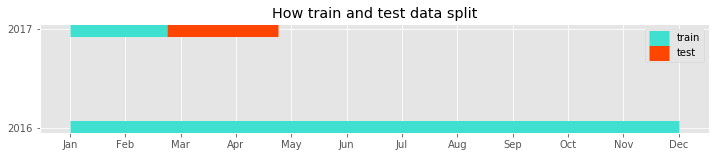

In [317]:
# Train and test data split
fig, ax = plt.subplots(figsize=(12,2));
l1=plt.hlines(2016, 1 , 12, color = 'turquoise', lw=15, label = 'train');
l2=plt.hlines(2017, 1 , 2.75, color = 'turquoise', lw=15);
l3=plt.hlines(2017, 2.75 , 4.75, color = 'orangered', lw=15, label = 'test');
plt.xticks(np.arange(1,13), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'));
plt.yticks([2016,2017]);
plt.legend(prop={'size': 10});
plt.title('How train and test data split');

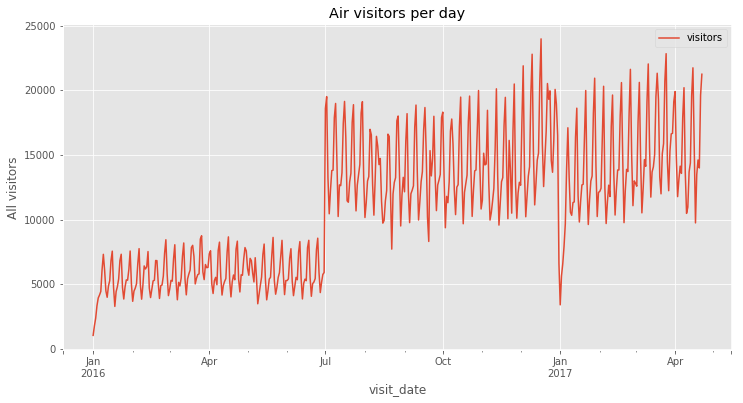

In [318]:
# Time series of the total number of air visitors
v = air_visit.groupby('visit_date').sum()
v.head()
v.index = pd.DatetimeIndex(v.index)
ax = v.plot(figsize=(12,6));
ax.set_ylabel('All visitors');
plt.title('Air visitors per day');
#plt.savefig('1.png')

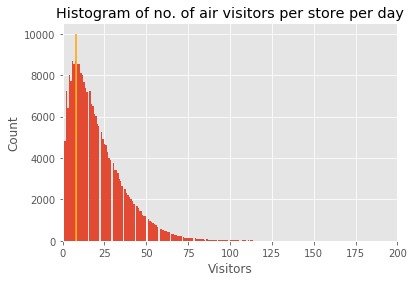

In [319]:
# Histogram of the number of visitors per store per day
r = air_visit.groupby(['air_store_id', 'visit_date']).sum()
ax=r.visitors.hist(bins=1000);
ax.vlines(8,0,10000,colors = 'orange');
ax.set_xlim([0,200]);
ax.set_ylabel('Count');
ax.set_xlabel('Visitors');
plt.title('Histogram of no. of air visitors per store per day');

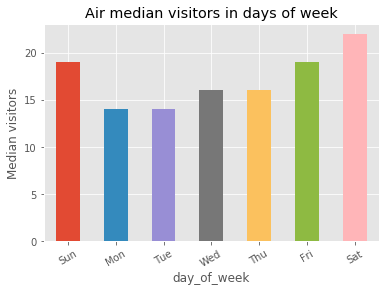

In [320]:
# Bar plot of median number of visitors per store in days of week
air_visit['visit_date'] = pd.to_datetime(air_visit['visit_date'])
air_visit['day_of_week'] = air_visit['visit_date'].dt.weekday_name
air_visit['day_of_week'] = air_visit['day_of_week'].apply(lambda x: x[:3])
wd = air_visit.groupby('day_of_week').median()
wd = wd.reindex(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
ax = wd['visitors'].plot.bar();
ax.set_ylabel('Median visitors');
plt.xticks(rotation=30);
plt.title('Air median visitors in days of week');

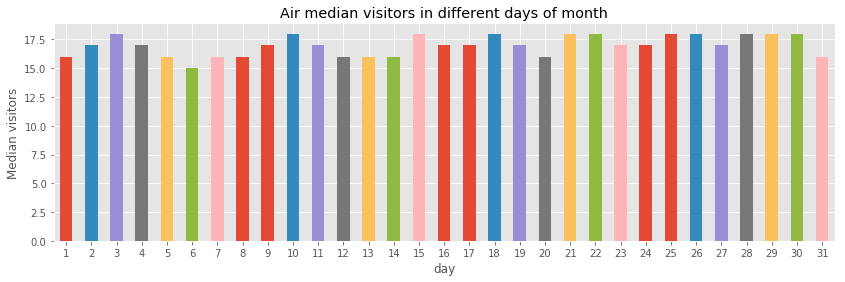

In [321]:
# Bar plot of median number of visitors per store in hours of day
air_visit['day'] = air_visit['visit_date'].dt.day
m = air_visit.groupby('day').median()
ax = m['visitors'].plot.bar(figsize=(14,4));
ax.set_ylabel('Median visitors');
plt.title('Air median visitors in different days of month');
plt.xticks(rotation=0);

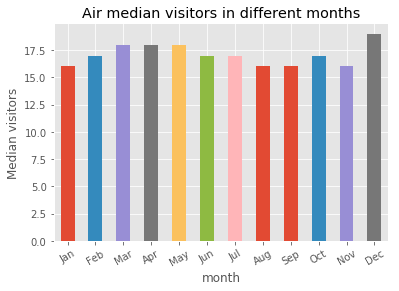

In [322]:
# Bar plot of median number of visitors per store in days of week
air_visit['month'] = air_visit['visit_date'].dt.month
m = air_visit.groupby('month').median()
ax = m['visitors'].plot.bar();
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
ax.set_ylabel('Median visitors');
plt.title('Air median visitors in different months');
plt.xticks(rotation=30);

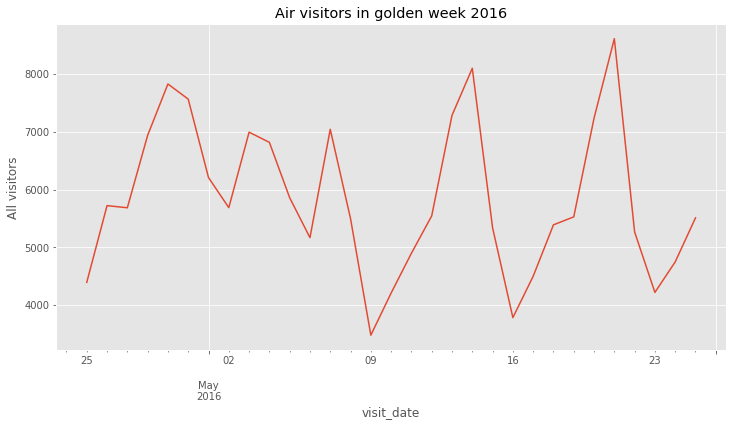

In [323]:
# Time series of visitors in golden week 2016
gw_16 = air_visit.groupby('visit_date').sum()
mask = (gw_16.index >= '2016-04-25') & (gw_16.index <= '2016-05-25')
gw_16=gw_16[mask]
ax = gw_16['visitors'].plot(figsize=(12,6));
ax.set_ylabel('All visitors');
plt.title('Air visitors in golden week 2016');

In [324]:
# Extract hour and time difference features from air reserve dataframe
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['visit_date'] = air_reserve['visit_datetime'].apply(lambda x: x.date())
air_reserve['reserve_date'] = air_reserve['reserve_datetime'].apply(lambda x: x.date())
air_reserve['hour'] = air_reserve['reserve_datetime'].apply(lambda x: x.hour)
air_reserve['time_diff'] = air_reserve['visit_datetime']-air_reserve['reserve_datetime']
air_reserve['time_diff'] = air_reserve['time_diff'].apply(lambda x: x.days*60+x.seconds//3600)
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,reserve_date,hour,time_diff
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,2016-01-01,16,3
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,2016-01-01,19,0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,2016-01-01,19,0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,2016-01-01,16,4
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,2016-01-01,1,19


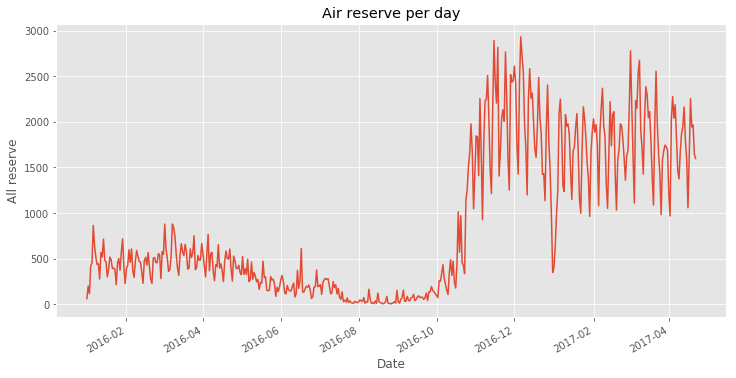

In [325]:
# Time series of the total number of air reserve visitors
r = air_reserve.groupby('reserve_date').sum()
r.index = pd.DatetimeIndex(r.index)
ax = r['reserve_visitors'].plot(figsize=(12,6));
ax.set_xlabel('Date');
ax.set_ylabel('All reserve');
plt.title('Air reserve per day');

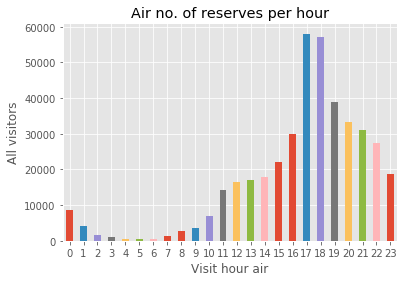

In [326]:
# Bar plot of the number of reserves made per hour
h = air_reserve.groupby('hour').sum()
ax=h['reserve_visitors'].plot.bar();
ax.set_ylabel('All visitors');
ax.set_xlabel('Visit hour air');
plt.title('Air no. of reserves per hour');
plt.xticks(rotation=0);

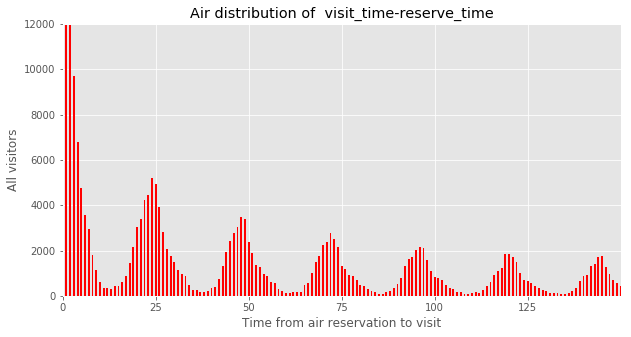

In [327]:
# Histogram of (visitors - reserve visitors) 
td = air_reserve.groupby('time_diff').sum().drop('hour', axis=1)
ax=td.reserve_visitors.plot.bar(figsize=(10,5), color='red');
ax.set_ylim([0,12000])
ax.set_ylabel('All visitors');
ax.set_xlim([0,150])
ax.set_xlabel('Time from air reservation to visit');
ax.set_xticks(np.arange(0,150,25));
ax.set_xticklabels([0,25,50,75,100,125], rotation=0);
plt.title('Air distribution of  visit_time-reserve_time');

In [328]:
# Map of all air restaurants
import folium
from folium.plugins import MarkerCluster

lats=air_store['latitude'].tolist()
lons=air_store['longitude'].tolist()
popups=air_store['air_genre_name'].tolist()

Map = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='Cartodb Positron',
    zoom_start=6
)

marker_cluster = MarkerCluster(
    name='air_stores',
    overlay=True,
    control=False,
    icon_create_function=None
)

for k in range(len(popups)):
    location = lats[k], lons[k]
    marker = folium.Marker(location=location)

    popup = popups[k]
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(Map)
folium.LayerControl().add_to(Map)
Map

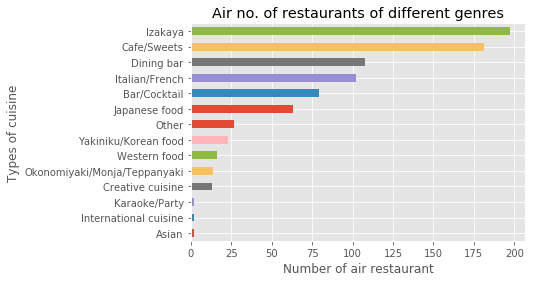

In [329]:
# Bar plot of the number of restaurants per genre
g = air_store.groupby('air_genre_name').count()
ax = g.sort_values('air_store_id', ascending=True)['air_store_id'].plot.barh();
ax.set_xlabel('Number of air restaurant');
ax.set_ylabel('Types of cuisine');
plt.title('Air no. of restaurants of different genres');

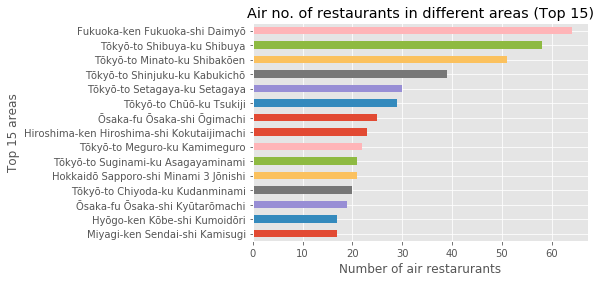

In [330]:
# Bar plot of the number of restaurants per area (top 15)
a = air_store.groupby('air_area_name').count()
ax = a.sort_values('air_store_id', ascending=True)['air_store_id'].tail(15).plot.barh();
ax.set_xlabel('Number of air restarurants');
ax.set_ylabel('Top 15 areas');
plt.title("Air no. of restaurants in different areas (Top 15)");

In [331]:
# Import the date info dataframe
date_info = pd.read_csv('all/date_info.csv')
date_info = date_info.rename(columns={'calendar_date':'date'})
date_info['date'] = pd.to_datetime(date_info['date'])
date_info = date_info[date_info['date'] <= '2017-04-22']
date_info.tail()

,date,day_of_week,holiday_flg
473,2017-04-18,Tuesday,0
474,2017-04-19,Wednesday,0
475,2017-04-20,Thursday,0
476,2017-04-21,Friday,0
477,2017-04-22,Saturday,0


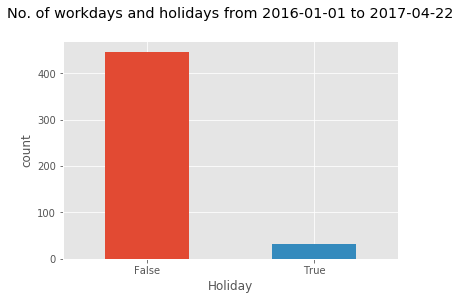

In [332]:
# Bar plot of workdays and holidays
h = date_info.groupby('holiday_flg').count()
ax = h['date'].plot.bar();
ax.set_xlabel('Holiday');
ax.set_xticklabels(['False', 'True'], rotation='horizontal');
ax.set_ylabel('count');
plt.title("No. of workdays and holidays from 2016-01-01 to 2017-04-22", y=1.08);

In [333]:
# Calculate the percentage of holidays in the train-test period
holiday_percent = h.iloc[1,0]/(h.iloc[0,0]+h.iloc[1,0])*100
print('The percent of holiday from 2016-01-01 to 2017-05-31 is {0:.3f}%'.format(holiday_percent))

The percent of holiday from 2016-01-01 to 2017-05-31 is 6.485%


## 2. Feature Relations

In [334]:
g = air_visit.join(air_store.set_index('air_store_id'), on='air_store_id')
g = g.groupby(['air_genre_name', 'visit_date']).mean()
g = g.reset_index()

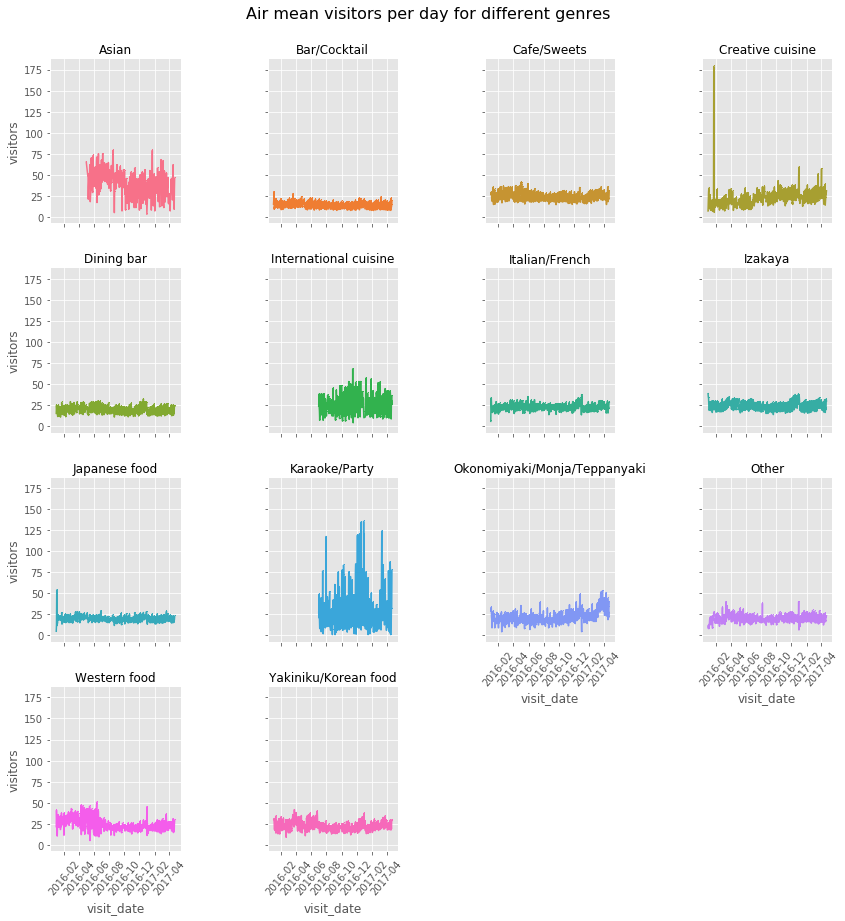

In [335]:
# Time series of mean visitors per day of different genres 
import seaborn as sns
f = sns.FacetGrid(g, col="air_genre_name", col_wrap=4, hue = "air_genre_name");
f.map(plt.plot, "visit_date", "visitors", marker=',').set_titles("{col_name}");
f.set_xticklabels(rotation =50);
f.fig.suptitle('Air mean visitors per day for different genres', y=1.03, fontsize=16);

In [336]:
g = air_visit.join(air_store.set_index('air_store_id'), on='air_store_id')
weekday2num = {'Sun':0,'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6} 
num2weekday = {i:k for (k,i) in weekday2num.items()}
g['dayweek_num'] =  g['day_of_week'].apply(lambda x: weekday2num[x])
g = g.groupby(['air_genre_name', 'day_of_week']).mean()
g = g.reset_index()
g = g.sort_values('dayweek_num')
g = air_visit.join(air_store.set_index('air_store_id'), on='air_store_id')

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



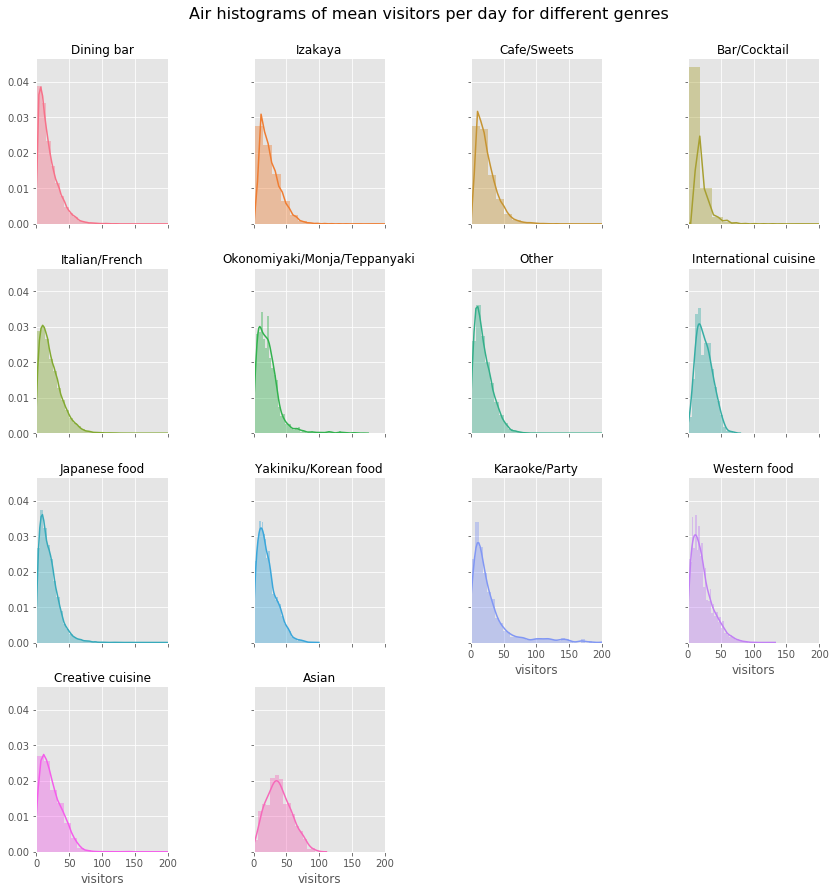

In [337]:
# Histograms of mean visitors per day of different genres
f = sns.FacetGrid(g, col="air_genre_name", col_wrap=4, hue = "air_genre_name");
f.map(sns.distplot, "visitors").set_titles("{col_name}");
plt.xlim([0,200]);
f.fig.suptitle('Air histograms of mean visitors per day for different genres', y=1.03, fontsize=16);

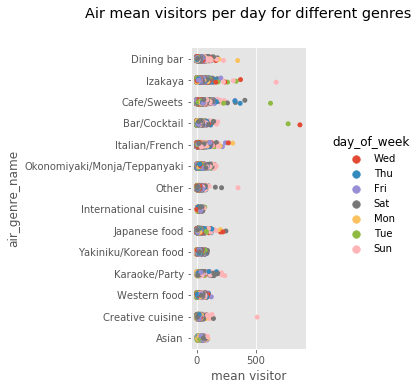

In [338]:
# Categorical plot of mean visitors per day of week of different genres
sns.catplot(x='visitors', y="air_genre_name", data=g, hue = 'day_of_week');
plt.xlabel('mean visitor');
plt.title('Air mean visitors per day for different genres', y=1.08);

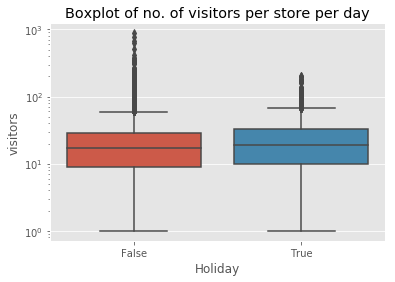

In [339]:
# Boxplot of the number of visitors per store in weekdays and holidays
c = pd.merge(air_visit, date_info, how='left', left_on='visit_date', right_on='date')
c = c.rename(columns={'day_of_week_x':'day_of_week'})
ax = sns.boxplot(x="holiday_flg", y="visitors", data=c)
ax.set(xlabel='Holiday', yscale="log")
ax.set_xticklabels(['False', 'True']);
plt.title('Boxplot of no. of visitors per store per day');

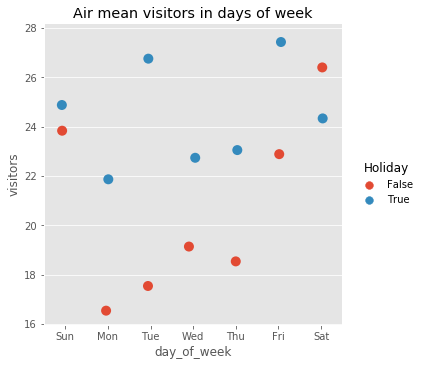

In [340]:
# Mean visitors in days of week
c['dayweek_num'] =  c['day_of_week'].apply(lambda x: weekday2num[x])
w = c.groupby(['holiday_flg','day_of_week']).mean()
w = w.reset_index()
w = w.sort_values('dayweek_num')

ax=sns.catplot(x='day_of_week', y="visitors", data=w, hue='holiday_flg', s=10);
ax.set_xticklabels(rotation =50);
ax._legend.set_title('Holiday')
new_labels = ['False', 'True']
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l);
plt.title('Air mean visitors in days of week');
plt.xticks(rotation=0);

In [341]:
# Function to get prefecture from area name
import re
def get_prefecture(s):
    m = re.search('([^\s]+)',s)
    return m.group(1)

<input>:4: DeprecationWarning:

invalid escape sequence \s

<input>:4: DeprecationWarning:

invalid escape sequence \s

<input>:4: DeprecationWarning:

invalid escape sequence \s

<ipython-input-341-96142ff71df0>:4: DeprecationWarning:

invalid escape sequence \s



In [342]:
# Plotting distribution of stores of different genres in each prefecture
air_store['area'] = air_store['air_area_name'].apply(lambda x: get_prefecture(x))
c = air_store.groupby(['area', 'air_genre_name']).count()
c['count'] = c['air_store_id']
c = c.reset_index()

from plotnine import *
p=(ggplot(c, aes(x='area', y='air_genre_name'))
+ geom_count(aes(size ='count'),colour = "blue")
+ theme(axis_text_x=element_text(rotation=30, hjust=1))
+ labs(title="Air no. of restaurants per genre per area")
+ theme(figure_size=(16, 10)));
p

p.save(filename = 'air.png', height=5, width=12, units = 'in')

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning:

Saving 12 x 5 in image.

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning:

Filename: air.png



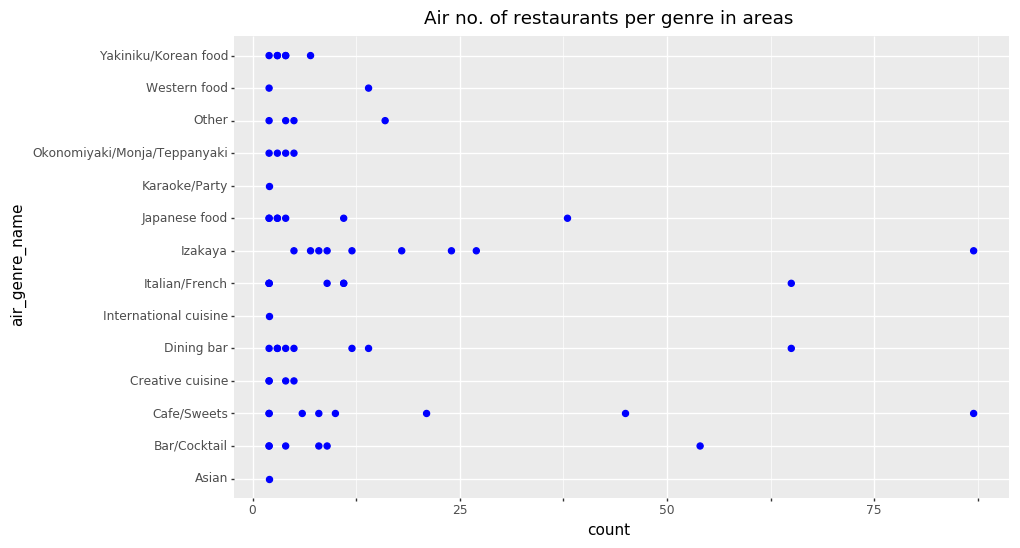

<ggplot: (-9223372029823456340)>

In [343]:

p=(ggplot(c, aes(x='count', y='air_genre_name'))
+ geom_point(colour = "blue", size = 2)
+ labs(title="Air no. of restaurants per genre in areas")
#+ theme(scale_x_discrete(breaks = np.arange(1,100)))
+ theme(axis_ticks_length=2)
+ theme(figure_size=(10, 6)));
p

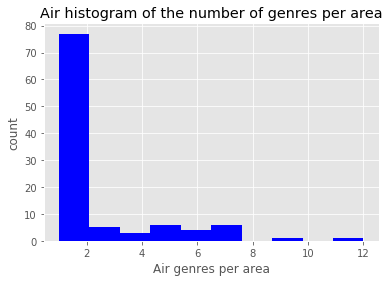

In [344]:
# Histogram of the number of genres per area
a = air_store.groupby(['air_area_name','air_genre_name']).count()
a = a.reset_index()
name_list = a['air_area_name'].unique()
count_list = []
for name in name_list:
    count = a[a['air_area_name'] == name].count()[0]
    count_list.append(count)
df = pd.DataFrame.from_dict(data = {'area': name_list, 'count': count_list})
df.hist(color = 'blue', bins=10);
plt.title('Air histogram of the number of genres per area');
plt.xlabel('Air genres per area');
plt.ylabel('count');

In [345]:
g['log1p_visitors'] = g['visitors'].apply(lambda x: np.log1p(x))
v = g.groupby(['air_area_name','air_genre_name']).agg(['mean'])
v['mean_log1p_visitors'] = v['log1p_visitors']['mean'].apply(lambda x: x)
c = air_store.groupby(['air_area_name', 'air_genre_name']).count()
c['count'] = c['air_store_id'].apply(lambda x: x)

In [346]:
vc = v.join(c)
vc = vc.reset_index()
vc['mean_log1p_visitors'] = vc[vc.columns[7]]
vc_std = vc.groupby('count').agg('std')
vc_std['std'] = vc_std['mean_log1p_visitors']
vc_std = vc_std.reset_index()
df1 = vc_std[['count', 'std']]

df2 = vc.groupby('count').agg('mean')
df2['mean of mean_log_1p_visitors'] = df2['mean_log1p_visitors']
df2 = df2.reset_index()

df = df1.join(df2.set_index('count'), on='count')
df['ymin'] = df['mean_log1p_visitors'] - df['std']
df['ymax'] = df['mean_log1p_visitors'] + df['std']

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning:

geom_errorbar : Removed 4 rows containing missing values.



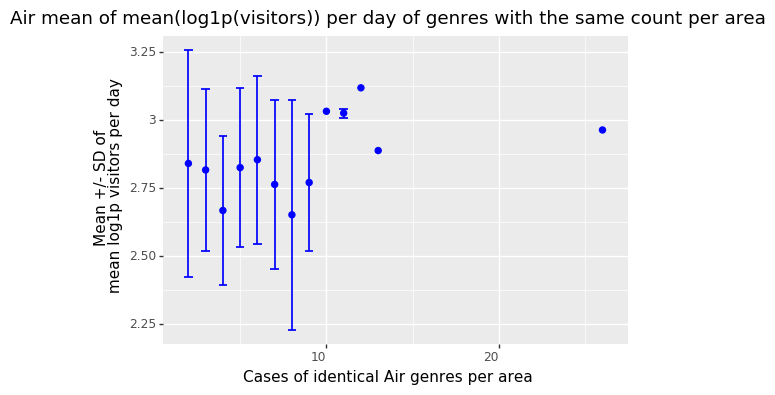

<ggplot: (-9223372036548996117)>

In [347]:
# Pointplot mean of mean lop1p(visitors) of genres with the same count per area
p=(ggplot(df, aes(x='count', y='mean of mean_log_1p_visitors'))
+ geom_count(colour = "blue", size = 2)
+ geom_errorbar(aes(ymin = 'ymin', ymax = 'ymax'), 
                   width = 0.5, size = 0.7, color = "blue")
+ theme(axis_text_x=element_text(hjust=1))
+ theme(figure_size=(6, 4))
+ labs(title="Air mean of mean(log1p(visitors)) per day of genres with the same count per area")
+ labs(x = "Cases of identical Air genres per area", y = "Mean +/- SD of\n mean log1p visitors per day"));
p

In [348]:
ar = air_reserve.groupby(['air_store_id', 'visit_date']).sum()
ar = ar.reset_index()
ar['visit_date'] = pd.to_datetime(ar['visit_date'])
ar = ar.rename(columns={'reserve_visitors':'air_r'})
av = air_visit.groupby(['air_store_id', 'visit_date']).sum()
av = av.reset_index()
av['visit_date'] = pd.to_datetime(av['visit_date'])

avr = pd.merge(av, ar, how='outer', left_on=['air_store_id','visit_date'], 
              right_on = ['air_store_id','visit_date'])
avr = avr[['air_store_id','visit_date','visitors','air_r']]

avr[['visitors','air_r']] = avr[['visitors','air_r']].fillna(0)

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



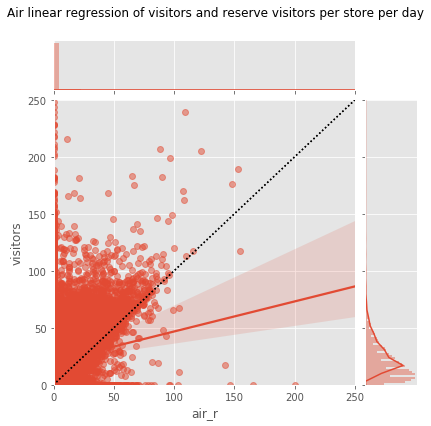

In [349]:
# Linear regression plot of visitors and reserved visitors
#sns.set();
g = sns.jointplot("air_r", "visitors", data=avr, kind="reg",
                 xlim=(0,250), ylim=(0,250), scatter_kws={'alpha':0.5},
                  marginal_kws=dict(bins=500));
lims = [(0,0), (250, 250)];
g.ax_joint.plot(lims, lims, ':k');
plt.subplots_adjust(top=.9)
g.fig.suptitle('Air linear regression of visitors and reserve visitors per store per day');

## 3. Feature Engineering

In [350]:
dw = air_visit.copy()
dw['log1p_visitors'] = dw['visitors'].apply(lambda x: np.log1p(x))

from pandas.api.types import CategoricalDtype
day_list = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat'] 
day = CategoricalDtype(categories=day_list, ordered=True)
dw['Day'] = dw['day_of_week'].astype(str).astype(day)

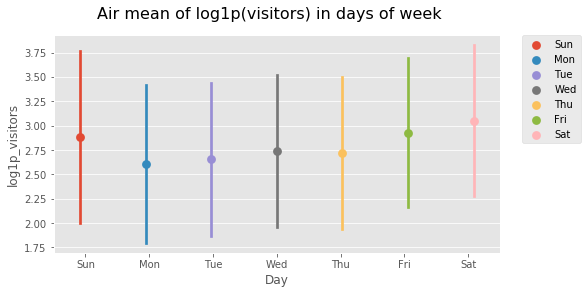

In [351]:
# Pointplot of mean of log1p(visitors) per days of week
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.pointplot("Day", "log1p_visitors", data=dw, marker=',', dodge=True, join=False, 
      ci='sd', order = day_list, hue = 'Day');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
fig.suptitle('Air mean of log1p(visitors) in days of week', fontsize=16);

In [352]:
m = air_visit.copy()
num2month={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
           7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'};
m['log1p_visitors'] = m['visitors'].apply(lambda x: np.log1p(x))
m['Month'] = m['month'].apply(lambda x: num2month[x])

month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
month = CategoricalDtype(categories=month_list, ordered=True)
m['Month'] = m['Month'].astype(str).astype(month)

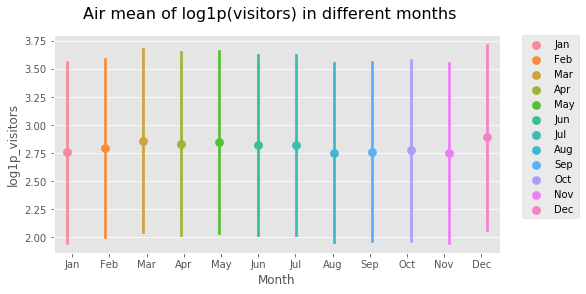

In [353]:
# Pointplot of mean of log1p(visitors) per month
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.pointplot("Month", "log1p_visitors", data=m, marker=',', dodge=True, join=False, 
      ci='sd', order = month_list, hue = 'Month');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
fig.suptitle('Air mean of log1p(visitors) in different months', fontsize=16);

In [354]:
air_vs = pd.merge(air_visit, air_store, how='left', left_on='air_store_id',
                  right_on='air_store_id')
air_vs['log1p_visitors'] = air_vs['visitors'].apply(lambda x: np.log1p(x))
air_genre_list = sorted(air_store['air_genre_name'].unique())

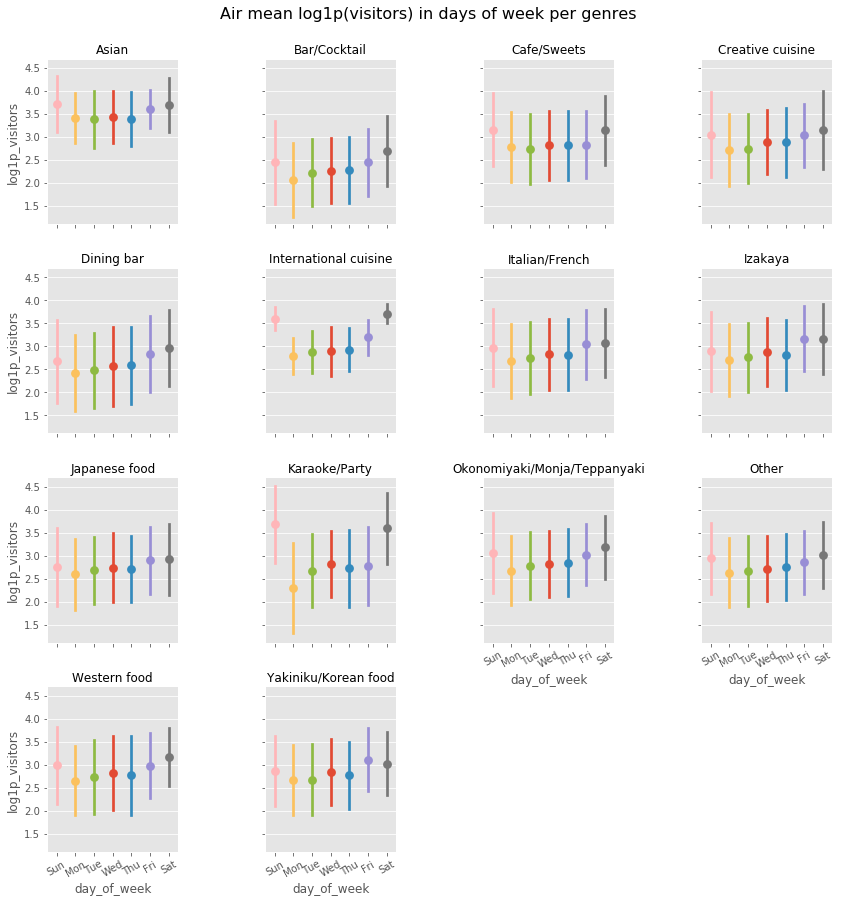

In [355]:
# Poinplot of the mean log1p(visitors) in days of week per genres
f = sns.FacetGrid(air_vs, col="air_genre_name", col_wrap=4, hue = "day_of_week",
                 col_order = air_genre_list );
f.map(sns.pointplot, "day_of_week", "log1p_visitors", marker=',', dodge=True, join=False, 
      ci='sd', order = day_list ).set_titles("{col_name}");
f.set_xticklabels(rotation =30);
f.fig.suptitle('Air mean log1p(visitors) in days of week per genres', y=1.03, fontsize=16);

In [356]:
air_r = air_reserve.groupby(['air_store_id', 'reserve_date']).sum()
air_r = air_r.reset_index()
air_r['reserve_date'] = pd.to_datetime(air_r['reserve_date'])

air_vminusr = pd.merge(air_visit, air_r, how='left', left_on=['air_store_id', 'visit_date'],
                      right_on=['air_store_id', 'reserve_date'])
air_vminusr['visitors'] = air_vminusr['visitors'].fillna(0)
air_vminusr['reserve_visitors'] = air_vminusr['reserve_visitors'].fillna(0)
air_vminusr['visitors-reserve_visitors'] = air_vminusr['visitors']-air_vminusr['reserve_visitors']
day_list = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat'] 
day = CategoricalDtype(categories=day_list, ordered=True)
air_vminusr['Day'] = air_vminusr['day_of_week'].astype(str).astype(day)

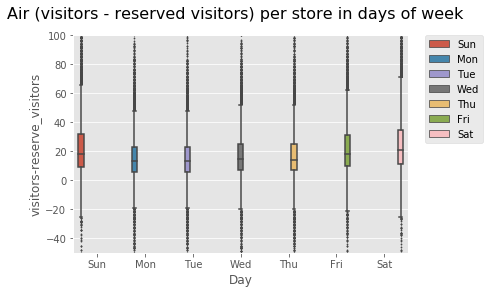

In [357]:
# Boxplot (visitors - reserved visitors) per store in days of week
fig, ax = plt.subplots()
ax = sns.boxplot("Day", "visitors-reserve_visitors", data=air_vminusr, hue = 'Day',
                 fliersize=1,);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);
ax.set_ylim([-50, 100])      
fig.suptitle('Air (visitors - reserved visitors) per store in days of week', fontsize=16);

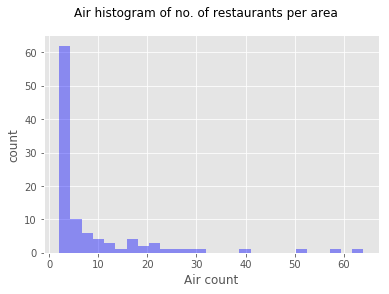

In [358]:
# Histogram of  the number of restaurants per area
air_area = air_store.groupby('air_area_name').count()
fig, ax = plt.subplots(1)
sns.distplot(air_area['area'], kde=False, ax=ax, color='blue');
ax.set_ylabel('count');
ax.set_xlabel('Air count');
fig.suptitle('Air histogram of no. of restaurants per area');

In [359]:
air_v = air_visit.copy()
air_v['log1p_visitors'] = air_v['visitors'].apply(lambda x: np.log1p(x))
air_v = air_v.groupby('air_store_id').mean()
air_v = air_v.reset_index()

air_vs = pd.merge(air_v, air_store, how='left', left_on='air_store_id',
                 right_on='air_store_id')
air_vs = air_vs.groupby('air_area_name').agg(['mean', 'count'])
air_vs['mean_log1p_visitors'] = air_vs['log1p_visitors']['mean']
air_vs['stores_per_area'] = air_vs['log1p_visitors']['count']
air_vs = air_vs.groupby('stores_per_area').agg(['mean','std'])
air_vs['mean log1p_visitors'] = air_vs.iloc[:,-2]
air_vs['sd'] = air_vs.iloc[:,-1]
air_vs = air_vs.reset_index()

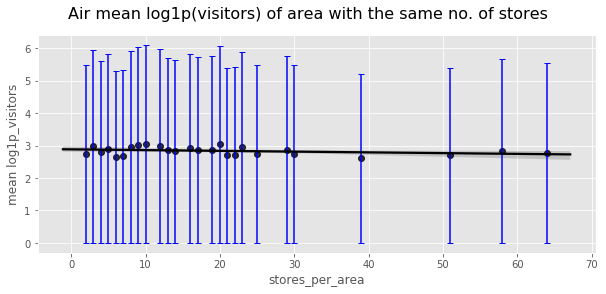

In [360]:
# Poinplot of mean log1p(visitors) of the same number of stores per area 
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.regplot("stores_per_area", "mean log1p_visitors", data=air_vs, marker='o',color='black');
fig.suptitle('Air mean log1p(visitors) of area with the same no. of stores', fontsize=16);

x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

del x_coords[-1] 
del y_coords[-1]       
errors = air_vs['sd']
ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', color='blue', capsize=3);

In [361]:
# Function to calculate the distance between two points of the earth
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [362]:
# Add a column of distance between each restaurant and median point of restaurants
air_lat_median = air_store['latitude'].median()
air_lon_median = air_store['longitude'].median()

air_dist = air_store.copy()
air_dist["Air linear distance (km)"]=air_dist.apply(lambda row: 
                                             haversine(row['latitude'],row['longitude'],
                                             air_lat_median, air_lon_median), axis=1)

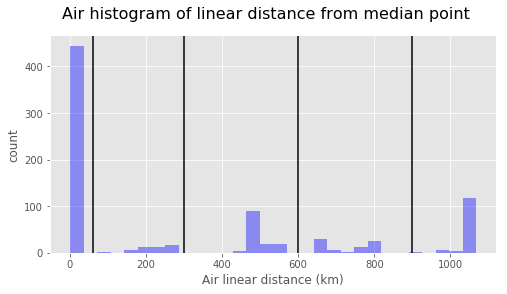

In [363]:
# Histogram of linear distance from the median point of all restaurants
fig, ax = plt.subplots(1, figsize=(8,4));
sns.distplot(air_dist['Air linear distance (km)'], kde=False, ax=ax, bins = 30, color='blue');
ax.set_ylabel('count')
for i in [60, 300, 600, 900]:
    ax.axvline(i ,color='black',linewidth=1.5)
fig.suptitle('Air histogram of linear distance from median point', fontsize=16);

In [364]:
def group_by_dist(x):
    if x < 60:
        return 1
    elif x < 300:
        return 2
    elif x < 600:
        return 3
    elif x < 900:
        return 4
    else:
        return 5
    
air_distv = pd.merge(air_v, air_dist, how='left', left_on='air_store_id', 
                     right_on='air_store_id')
air_distv['Distance Grouping'] = air_distv["Air linear distance (km)"].apply(lambda x:
                                                                             group_by_dist(x))

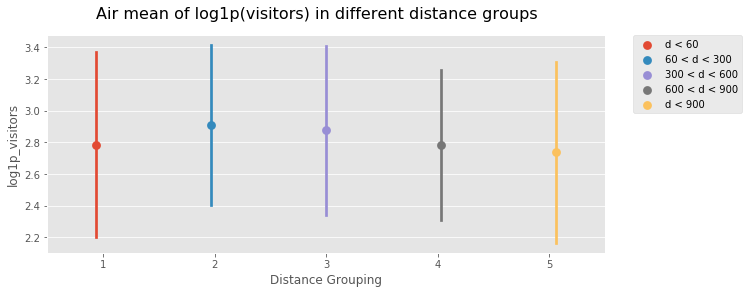

In [365]:
# Pointplot of mean log1p(visitors) in each distance group
fig, ax = plt.subplots(figsize=(10,4))
g = sns.pointplot("Distance Grouping", "log1p_visitors", data=air_distv, marker=',', 
                  dodge=True, join=False, ci='sd', hue = 'Distance Grouping', ax=ax);
new_labels = ['d < 60', '60 < d < 300', '300 < d < 600', '600 < d < 900', 'd < 900']
for t, l in zip(plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).get_texts(), 
                new_labels): 
    t.set_text(l)
fig.suptitle('Air mean of log1p(visitors) in different distance groups', fontsize=16);

In [366]:
a = air_store.copy()
a = a.sort_values(by=['latitude', 'longitude'])
air_lats=a['latitude'].tolist()
air_lons=a['longitude'].tolist()
air_popups=a['air_genre_name'].tolist()

median_location = [np.median(air_lats), np.median(air_lons)]
median_popups = ['Median of Air restaurants']

In [367]:
# Map of the median point of restaurants and all restaurants
from folium import plugins

Map = folium.Map(
    location=median_location,
    tiles='Cartodb Positron',
    zoom_start=5,
    control_scale=True
)

median = folium.FeatureGroup(name='Median')
median.add_child(folium.Marker(location=median_location, 
                               popup='Median',icon=folium.Icon(color='green')))
Map.add_child(median)

air = folium.FeatureGroup(name='Air')
Map.add_child(air)

for k in range(len(air_popups)//4):
    location = air_lats[k*4], air_lons[k*4]
    marker = folium.Circle(location=location, popup=air_popups[k*4], radius = 50000,
                                color='blue', opacity=.2, fill_color='blue', fill_opacity=.3)
    air.add_child(marker)

folium.LayerControl().add_to(Map)
Map

In [368]:
air_s = air_store.copy()
air_s['Area'] = air_s['air_area_name'].apply(lambda x: get_prefecture(x))
air_s = air_s.groupby('Area').count()
air_s['count'] = air_s['air_store_id']

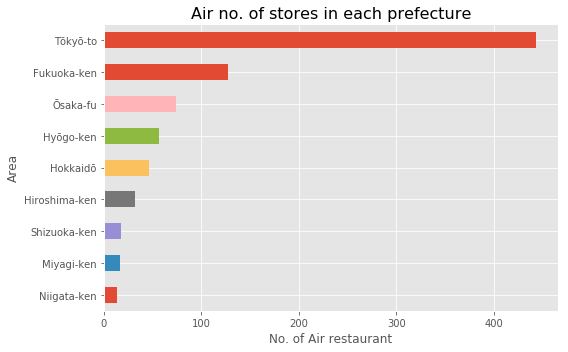

In [369]:
# Barplot of the number of stores in each prefecture
fig, ax = plt.subplots(1,figsize=(8,5));
air_s.sort_values('count', ascending=True)['count'].tail(15).plot.barh(ax=ax);
ax.set_xlabel('No. of Air restaurant')
ax.set_title('Air no. of stores in each prefecture', fontsize=16);
fig.tight_layout()

In [370]:
air_v = air_visit.copy()
air_v['log1p_visitors'] = air_v['visitors'].apply(lambda x: np.log1p(x))
air_v = air_v.groupby('air_store_id').mean()
air_v = air_v.reset_index()

air_s = air_store.copy()
air_s['Area'] = air_s['air_area_name'].apply(lambda x: get_prefecture(x))

air_vs = pd.merge(air_v, air_s, how='left', left_on='air_store_id',
                 right_on='air_store_id')

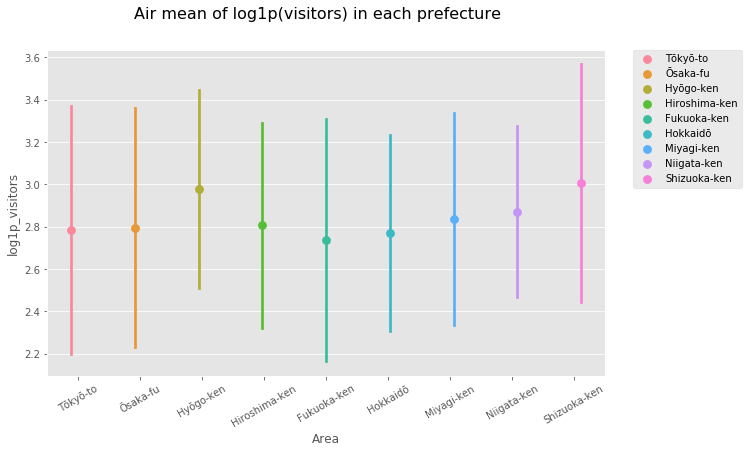

In [371]:
# Pointplot of mean log1p(visitors) in each prefecture
fig, ax = plt.subplots(figsize=(10,6))
g = sns.pointplot("Area", "log1p_visitors", data=air_vs, marker=',', 
                  dodge=True, join=False, ci='sd', hue = 'Area', ax=ax);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=30);
fig.suptitle('Air mean of log1p(visitors) in each prefecture', fontsize=16);

## 4. Modeling (Prophet)

In [372]:
all_days = pd.date_range(start='1/1/2016', end ='22/4/2017')
all_days = pd.DataFrame(all_days)
all_days = all_days.rename(columns = {0:'date'})

In [373]:
# Function to make training set for fbprophet
def prophet_train_set(air_id):
    ar = air_reserve[air_reserve['air_store_id']== air_id]
    ar = ar.groupby('visit_date').sum()
    ar = ar.reset_index()
    ar = ar[['visit_date','reserve_visitors']]
    ar = ar.rename(columns={'reserve_visitors':'air_r'})
    ar['visit_date'] = pd.to_datetime(ar['visit_date'])

    air_model = air_visit.copy()
    air_model = air_model[air_model['air_store_id'] == air_id]
    air_model = air_model.sort_values(by = 'visit_date')
    air_model['visit_date'] = pd.to_datetime(air_model['visit_date'])

    air_model = air_model.join(all_days.set_index('date'), on='visit_date', how='outer')
    air_model = air_model.sort_values(by='visit_date')
    air_model['log1p_visitors'] = air_model['visitors'].apply(np.log1p)
    air_model = air_model.rename({'visit_date':'ds', 'log1p_visitors':'y'}, axis=1)
    air_model = air_model.reset_index(drop=True)
    air_model = pd.merge(air_model,ar,how='left',left_on='ds',right_on='visit_date')
    air_model['air_r'] = air_model['air_r'].fillna(0)

    train = air_model[['ds', 'y', 'air_r']]
    train['y'] = train['y'].fillna(train['y'].median())
    return train

In [374]:
# Function to split train and test sets
split_date = '2017-02-23'
def train_test_split(train):
    test = train[train.ds >= split_date ]
    train = train[train.ds < split_date ]
    return train, test

In [375]:
# Constructing holidays dataframe for fbprophet
gw = ['2016-04-29','2016-04-30','2016-05-01','2016-05-02','2016-05-03','2016-05-04','2016-05-05',
    '2017-04-29','2017-04-30','2017-05-01','2017-05-02','2017-05-03','2017-05-04','2017-05-05']

def golden_week(ds):
    for day in gw:
        if ds == pd.to_datetime(day):
            return 1
    return 0

h = date_info[date_info['holiday_flg'] == 1]
holiday = pd.DataFrame({
  'holiday': 'holiday',
  'ds': h['date'],
  'lower_window': -1,
  'upper_window': 1,
})
golden = pd.DataFrame({
  'holiday': 'golden',
  'ds': pd.to_datetime(gw),
  'lower_window': -1,
  'upper_window': 1,
})
holidays = pd.concat((holiday, golden))
holidays['ds'] = pd.to_datetime(holidays['ds'])
holidays = holidays.sort_values(by='ds')
holidays = holidays.reset_index(drop=True)

In [376]:
# Parameter grid for tuning hyperparameters
from sklearn.model_selection import ParameterGrid
grid = {'holidays_prior_scale':[0.1, 1, 10],
        'changepoint_prior_scale':[0.05, 0.5, 0.001],
        'n_changepoints': [15, 25, 30], 
        "seasonalities['weekly']['fourier_order']": [3, 5],
        "seasonalities['weekly']['prior_scale']": [1, 10, 100],
        "seasonalities['monthly']['fourier_order']": [5, 10],
        "seasonalities['monthly']['prior_scale']": [1, 10, 100],
        "seasonalities['yearly']['fourier_order']": [10, 20],
        "seasonalities['yearly']['prior_scale']": [1, 10, 100],
        'growth' : ['linear']}

In [377]:
train = prophet_train_set('air_79f528087f49df06')
train, test = train_test_split(train)

/Users/cheunghoyeung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
# Tuning hyperparaters of fbprophet
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import time
paras_comb = list(ParameterGrid(grid))
#rand_paras = np.random.choice(paras_comb, 1000)
scores = np.zeros(len(paras_comb))
i=0;
start_time = time.time()
# Search best parameters
for paras in paras_comb:
            
    m = Prophet(holidays=holidays, 
                holidays_prior_scale=paras['holidays_prior_scale'], 
                changepoint_prior_scale=paras['changepoint_prior_scale'], 
                weekly_seasonality=True,
                daily_seasonality=False, 
                yearly_seasonality=True)
    
    m.add_seasonality(name='weekly', period=7, 
                      fourier_order=paras["seasonalities['weekly']['fourier_order']"], 
                      prior_scale=paras["seasonalities['weekly']['prior_scale']"])
    m.add_seasonality(name='monthly', period=30.5, 
                      fourier_order=paras["seasonalities['monthly']['fourier_order']"], 
                      prior_scale=paras["seasonalities['monthly']['prior_scale']"])
    m.add_seasonality(name='yearly', period=365.5, 
                      fourier_order=paras["seasonalities['yearly']['fourier_order']"], 
                      prior_scale=paras["seasonalities['yearly']['prior_scale']"])
    m.add_regressor('air_r')
    m.fit(train)
    
    future = m.make_future_dataframe(periods=59, freq = 'D')
    future = pd.merge(future,train, how='left',left_on='ds',right_on='ds')
    future['air_r'] = future['air_r'].fillna(0)
    future = future[['ds','air_r']]
            
    forecast = m.predict(future)
    scores[i]= np.sqrt(mean_squared_error(test['y'].values, 
                           forecast[forecast.ds >= split_date].yhat.values))
    i+=1
    print(i, end=' ')
    
print("--- %s seconds ---" % (time.time() - start_time))
best_paras = paras_comb[np.argmin(scores)]

In [379]:
# Save the best parameters obtained
import pickle
#pickle.dump(best_paras, open('prophet_best_paras.txt','wb'))
prophet_best_paras = pickle.load(open('prophet_best_paras.txt','rb'))
prophet_best_paras

{'changepoint_prior_scale': 0.001,
 'growth': 'linear',
 'holidays_prior_scale': 0.1,
 'n_changepoints': 15,
 "seasonalities['monthly']['fourier_order']": 5,
 "seasonalities['monthly']['prior_scale']": 10,
 "seasonalities['weekly']['fourier_order']": 3,
 "seasonalities['weekly']['prior_scale']": 1,
 "seasonalities['yearly']['fourier_order']": 10,
 "seasonalities['yearly']['prior_scale']": 1}

In [380]:
# Function to make prediction by fbprophet 
def predict(train, best_paras):
    m = Prophet(holidays=holidays, 
                n_changepoints=prophet_best_paras['n_changepoints'], 
                holidays_prior_scale=prophet_best_paras['holidays_prior_scale'], 
                changepoint_prior_scale=prophet_best_paras['changepoint_prior_scale'], 
                daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)

    m.add_seasonality(name='weekly', period=7, 
                      fourier_order=prophet_best_paras["seasonalities['weekly']['fourier_order']"], 
                      prior_scale=prophet_best_paras["seasonalities['weekly']['prior_scale']"])
    m.add_seasonality(name='monthly', period=30.5, 
                      fourier_order=prophet_best_paras["seasonalities['monthly']['fourier_order']"], 
                      prior_scale=prophet_best_paras["seasonalities['monthly']['prior_scale']"])
    m.add_seasonality(name='yearly', period=365.5, 
                      fourier_order=prophet_best_paras["seasonalities['yearly']['fourier_order']"], 
                      prior_scale=prophet_best_paras["seasonalities['monthly']['prior_scale']"])

    m.add_regressor('air_r')
    m.fit(train)
    
    future = m.make_future_dataframe(periods=59, freq = 'D')
    future = pd.merge(future,train,how='left',left_on='ds',right_on='ds')
    future['air_r'] = future['air_r'].fillna(0)
    future = future[['ds','air_r']]
    forecast = m.predict(future)
    forecast['id'] = air_id
    
    return m, forecast

In [381]:
# Evaluation metric for fbprophet
from sklearn.metrics import mean_squared_error

def test_score(forecast, test):
    yhat = forecast[forecast.ds >= split_date]['yhat'].values
    test['y'] = test['y'].fillna(test.y.median())
    y = test[test.ds >= split_date]['y'].values
    return np.sqrt(mean_squared_error(y, yhat))

In [382]:
# Different methods to plot the results
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

def plot_prophet(train, test, model, forecast):
    fig1 = (ggplot(forecast, aes('ds', 'yhat')) 
    + geom_ribbon(aes(x = 'ds', ymin = 'yhat_lower', ymax = 'yhat_upper'), fill = "skyblue") 
    + geom_line(colour = "blue") 
    + geom_line(train, aes('ds', 'y'), colour = "red")
    + geom_line(test, aes('ds', 'y'), colour = "grey") 
    + theme(figure_size=(24, 6))
    + labs(title="{} log1p(visitors)) per day".format(air_id)));
    
    fig2 = model.plot_components(forecast);
    return fig1, fig2

def plotly_plot(train,test,forecast):
    forecast['yhat_conv'] = forecast['yhat'].apply(lambda x: np.exp(x)-1)
    train['y_conv'] = train['y'].apply(lambda x: np.exp(x)-1)
    test['y_conv'] = test['y'].apply(lambda x: np.exp(x)-1)
    pred = go.Scatter(x=forecast.ds, y=forecast.yhat_conv, 
                       line = dict(color = '#17BECF'), opacity = 0.8, name='pred')
    train = go.Scatter(x=train.ds, y=train.y_conv,
                      line = dict(color = '#7F7F7F'), opacity = 0.8, name='train')
    test = go.Scatter(x=test.ds, y=test.y_conv,
                      line = dict(color = '#FF0080'), opacity = 0.8, name='test')
    data = [train, test, pred]
    return iplot({'data': data, 'layout': {'title': '{} no. of visitors'.format(air_id)}})

def plotly_plot_log(train,test,forecast):
    pred = go.Scatter(x=forecast.ds, y=forecast.yhat, 
                       line = dict(color = '#17BECF'), opacity = 0.8, name='pred')
    train = go.Scatter(x=train.ds, y=train.y,
                      line = dict(color = '#7F7F7F'), opacity = 0.8, name='train')
    test = go.Scatter(x=test.ds, y=test.y,
                      line = dict(color = '#FF0080'), opacity = 0.8, name='test')
    data = [train, test, pred]
    return iplot({'data': data, 'layout': {'title': 
                                           '{} no. of log1p(visitors)'.format(air_id)}})

In [383]:
def draw_air_id():
    air_list = air_visit['air_store_id'].unique()
    while True:
        air_id = np.random.choice(air_list)
        if air_visit[air_visit.air_store_id == air_id].shape[0] >= 300:
            break
    return air_id

In [ ]:
air_id = draw_air_id()
air_id

In [ ]:
train = prophet_train_set(air_id)
train, test = train_test_split(train)

In [ ]:
m, forecast = predict(train, prophet_best_paras)
tscore = test_score(forecast, test)
tscore

In [ ]:
plotly_plot_log(train, test, forecast)
plotly_plot(train, test, forecast)
#plot_prophet(train, test, m, forecast)

In [ ]:
train.to_csv('air_79f528087f49df06_train_set.csv')

In [ ]:
# Collect test scores of all air stores
air_ids = air_visit.air_store_id.unique()
df_pred=[]
test_scores_list = []
i=0
start_time = time.time()

for air_id in air_ids:
    train = prophet_train_set(air_id)
    train, test = train_test_split(train)
    m ,forecast = predict(train, best_paras)
    df_pred.append(forecast[['id','ds','yhat']])
    test_scores_list.append(test_score(forecast, test))
    print(i, end=' ')
    i+=1

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Dataframe of all predictions
df = pd.concat(df_pred)

In [ ]:
# Save all predictions in a dataframe
df.to_csv('submission_latest.csv')

## 5. Modeling (XGBoost)

In [549]:
# Prepare training data for xgboost model
av = air_visit.groupby(['air_store_id','visit_date']).sum()
av =  av.reset_index()

ar1 = air_reserve.groupby(['air_store_id', 'visit_date']).sum()
ar1 = ar1.reset_index()
ar1 = ar1.rename({'reserve_visitors':'reserve'}, axis=1)
ar1 = ar1[['air_store_id','visit_date','reserve']]
ar2 = air_reserve.groupby(['air_store_id', 'visit_date']).mean()
ar2 = ar2.reset_index()
ar2 = ar2[['air_store_id','visit_date','time_diff']]
ar = pd.merge(ar1,ar2,how='inner',left_on=['air_store_id','visit_date'],
             right_on=['air_store_id','visit_date'])
ar['visit_date'] = pd.to_datetime(ar['visit_date'])

air_vr = pd.merge(av,ar,how='outer',left_on=['air_store_id','visit_date'],
                 right_on=['air_store_id','visit_date'])
air_vr = air_vr.fillna(0)

air_all = pd.merge(air_vr,air_store,how='left',left_on='air_store_id',
                  right_on='air_store_id')
air_all = air_all.drop('air_area_name', axis=1)

genre = pd.get_dummies(air_all['air_genre_name'])
area = pd.get_dummies(air_all['area'])

air_all['log1p_visitors'] = air_all['visitors'].apply(np.log1p)
air_xgboost = air_all[['air_store_id','visit_date','reserve','time_diff',
                      'latitude','longitude', 'log1p_visitors']]
air_xgboost = pd.concat([air_xgboost, genre, area], axis=1, sort=False)

air_xgboost = air_xgboost.sort_values(['air_store_id','visit_date'])
air_xgboost = air_xgboost.rename(columns={'visit_date':'ds', 'log1p_visitors':'y'})
air_xgboost = air_xgboost.reset_index(drop=True)

In [550]:
lat_median = air_xgboost['latitude'].median()
lon_median = air_xgboost['longitude'].median()
lat_25 = air_xgboost['latitude'].quantile(.25)
lat_75 = air_xgboost['latitude'].quantile(.75)
lon_25 = air_xgboost['latitude'].quantile(.25)
lon_75 = air_xgboost['latitude'].quantile(.75)
air_xgboost['latitude'] = air_xgboost['latitude'].apply(lambda x: 
                                                        (x-lat_median)/(lat_75 - lat_25))
air_xgboost['longitude'] = air_xgboost['longitude'].apply(lambda x: 
                                                        (x-lon_median)/(lon_75 - lon_25))

In [551]:
air_list = air_visit['air_store_id'].unique()
air_id = np.random.choice(air_list)
air_id ='air_2cee51fa6fdf6c0d'

In [552]:
air_visit[air_visit.air_store_id == air_id].shape

(407, 6)

In [553]:
train = air_xgboost[air_xgboost.air_store_id == air_id]
train = train.drop(['air_store_id'],axis=1)

In [556]:
# Amendment of data_info dataframe to fit the training set
day2num = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,
          'Sunday':7}
date_info['week_num'] = date_info['day_of_week'].apply(lambda x:day2num[x])
week_num = pd.get_dummies(date_info['week_num'])
week_num.rename(columns=lambda x: 'week'+str(x), inplace=True)
date_info['month'] = date_info['date'].apply(lambda x:x.month)
month = pd.get_dummies(date_info['month'])
month.rename(columns=lambda x: 'month'+str(x), inplace=True)
date_info['day'] = date_info['date'].apply(lambda x:x.day)
day = pd.get_dummies(date_info['day'])
day.rename(columns=lambda x: 'day'+str(x), inplace=True)
date_info['year']= date_info['date'].apply(lambda x:x.year)
year = pd.get_dummies(date_info['year'])
holiday_flg = pd.get_dummies(date_info['holiday_flg'])
holiday_flg.rename(columns=lambda x: 'holiday'+str(x), inplace=True)
di = pd.concat([date_info.date,year,month,day,week_num,holiday_flg], axis=1)

In [557]:
di.columns

Index([    'date',       2016,       2017,   'month1',   'month2',   'month3',
         'month4',   'month5',   'month6',   'month7',   'month8',   'month9',
        'month10',  'month11',  'month12',     'day1',     'day2',     'day3',
           'day4',     'day5',     'day6',     'day7',     'day8',     'day9',
          'day10',    'day11',    'day12',    'day13',    'day14',    'day15',
          'day16',    'day17',    'day18',    'day19',    'day20',    'day21',
          'day22',    'day23',    'day24',    'day25',    'day26',    'day27',
          'day28',    'day29',    'day30',    'day31',    'week1',    'week2',
          'week3',    'week4',    'week5',    'week6',    'week7', 'holiday0',
       'holiday1'],
      dtype='object')

In [558]:
fill_median_list = ['y', 'Asian', 'Bar/Cocktail','Cafe/Sweets', 'Creative cuisine', 
     'Dining bar','International cuisine', 'Italian/French', 'Izakaya', 'Japanese food',
     'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki', 'Other', 'Western food', 
     'Yakiniku/Korean food', 'Fukuoka-ken', 'Hiroshima-ken','Hokkaidō', 'Hyōgo-ken', 
     'Miyagi-ken', 'Niigata-ken', 'Shizuoka-ken', 'Tōkyō-to', 'Ōsaka-fu']

In [559]:
train=pd.merge(di,train,how='left',left_on='date',right_on='ds')
train = train.drop('ds',axis=1)
train[['reserve','time_diff']] = train[['reserve','time_diff']].fillna(0)
train[fill_median_list] = train[fill_median_list].fillna(train[fill_median_list].median())
train = train.rename({'date':'ds'}, axis=1)

In [560]:
scale_list = ['reserve', 'time_diff']
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(train[col])),columns=[col])
    return df

scaled_df = scaleColumns(train,scale_list)

In [561]:
scaled_df

,ds,2016,2017,month1,month2,month3,month4,month5,month6,month7,...,Yakiniku/Korean food,Fukuoka-ken,Hiroshima-ken,Hokkaidō,Hyōgo-ken,Miyagi-ken,Niigata-ken,Shizuoka-ken,Tōkyō-to,Ōsaka-fu
0,2016-01-01,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2016-01-02,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-03,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2016-01-04,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2016-01-05,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2016-01-06,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2016-01-07,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2016-01-08,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2016-01-09,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2016-01-10,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [562]:
scaled_df.to_csv('air_2cee51fa6fdf6c0d_tableau_set.csv')

In [563]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [564]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [ ]:
#xgb_model.get_params()

In [ ]:
# Parameter grid for tuning xgboost model
param_grid = {
    'n_estimators': [100,500,1000],
    'max_depth':[3,4,5],
    'min_child_weight':[4,5,6],
    'gamma':[i/10.0 for i in range(0,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

In [ ]:
# Split and rescale train and test sets
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = train.drop(['y'],axis=1)
X_train, X_test = train_test_split(X)
y = train[['ds','y']]
y_train, y_test = train_test_split(y)

X_train = X_train.set_index('ds')
X_test = X_test.set_index('ds')
y_train = y_train.set_index('ds')
y_test = y_test.set_index('ds')

X_train[scale_list] = scaler.fit_transform(X_train[scale_list])
X_test[scale_list] = scaler.fit_transform(X_test[scale_list])

In [ ]:
# GridSearchCV on xgboost model 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3, max_train_size=len(X_train))
g = GridSearchCV(xgb_model, param_grid, n_jobs=-1, cv=tscv, scoring = 'neg_mean_squared_error'
                          ,verbose = 1)
g.fit(X_train, y_train)
xgboost_best_paras = g.best_params_

In [ ]:
mean_test_score = g.cv_results_['mean_test_score']
mean_test_score.max()

In [526]:
#pickle.dump(xgboost_best_paras, open('xgboost_best_paras.txt','wb'))
xgboost_best_paras = pickle.load(open('xgboost_best_paras.txt','rb'))

In [527]:
xgboost_best_paras

{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 100,
 'reg_alpha': 0.01,
 'subsample': 0.85}

In [565]:
def store_train_set(air_id):
    train = air_xgboost[air_xgboost.air_store_id == air_id]
    train = train.drop(['air_store_id'],axis=1)
    train=pd.merge(di,train,how='left',left_on='date',right_on='ds')
    train = train.drop('ds',axis=1)
    train[['reserve','time_diff']] = train[['reserve','time_diff']].fillna(0)
    train[list1] = train[list1].fillna(train[list1].median())
    train = train.rename({'date':'ds'}, axis=1)
    
    X = train.drop(['y'],axis=1)
    X_train, X_test = train_test_split(X)
    y = train[['ds','y']]
    y_train, y_test = train_test_split(y)

    X_train = X_train.set_index('ds')
    X_test = X_test.set_index('ds')
    y_train = y_train.set_index('ds')
    y_test = y_test.set_index('ds')

    X_train[scale_list] = scaler.fit_transform(X_train[scale_list])
    X_test[scale_list] = scaler.fit_transform(X_test[scale_list])
    
    return X_train, X_test, y_train, y_test

In [619]:
# Evaluation metric for xgboost
from sklearn.metrics import mean_squared_error
def xgboost_test_score(pred, y_test):
    return np.sqrt(mean_squared_error(pred, y_test))

In [634]:
air_id = draw_air_id()
#air_id ='air_2cee51fa6fdf6c0d'

In [635]:
# Prediction by tuned xgboost model
X_train, X_test, y_train, y_test = store_train_set(air_id)
xgb_model = XGBRegressor(colsample_bytree=0.8,
                         gamma=0.4,
                         learning_rate=0.1,
                         max_depth=4,
                         min_child_weight=4,
                         n_estimators=100,
                         reg_alpha=0.01,
                         subsample=0.85)
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)
pickle.dump(xgb_model, open('xgboost_model.sav','wb'))
xgboost_test_score(pred, y_test)

0.5767734656209287

In [625]:
# Plotting prediction
df = pd.DataFrame({'ds': pd.date_range(start='23/02/2017', end='22/04/2017')})
p = pd.DataFrame({'yhat':pred})
predict = df.join(p)
y_train = y_train.reset_index()
y_test = y_test.reset_index()
plotly_plot_log(y_train,y_test,predict)
plotly_plot(y_train,y_test,predict)

In [636]:
import time
air_ids = air_visit['air_store_id'].unique()
scores_dict={}
pred_dict={}
y_train_dict={}
y_test_dict={}
start_time = time.time()
for air_id in air_ids:
    X_train, X_test, y_train, y_test = store_train_set(air_id)
    xgb_model.fit(X_train, y_train)
    pred = xgb_model.predict(X_test)
    
    df = pd.DataFrame({'ds': pd.date_range(start='23/02/2017', end='22/04/2017')})
    p = pd.DataFrame({'yhat':pred})
    predict = df.join(p)
    y_test = y_test.reset_index()
    y_train = y_train.reset_index()

    pred_dict[air_id] = predict
    y_test_dict[air_id] = y_test
    y_train_dict[air_id] = y_train

    scores_dict[air_id] = xgboost_test_score(pred, y_test['y'])
    
print("--- %s seconds ---" % (time.time() - start_time))    

--- 163.17786502838135 seconds ---


In [ ]:
y_test = y_test_dict['air_1c0b150f9e696a5f']
y_train = y_train_dict['air_1c0b150f9e696a5f']
pred = pred_dict['air_1c0b150f9e696a5f']

In [638]:
store_id = np.array(list(scores_dict.keys()))
scores = np.array(list(scores_dict.values()))
df_s = pd.DataFrame({'id':store_id, 'score': scores})
df_s.score.describe()

count    829.000000
mean       0.520041
std        0.261243
min        0.003879
25%        0.388117
50%        0.497768
75%        0.597718
max        4.408477
Name: score, dtype: float64

In [ ]:
plotly_plot_log(y_train,y_test,pred)

# Section Summary or Findings (Modeling)



In [ ]:
# References:
# https://www.kaggle.com/johannesss/forecasting-using-lstm-from-keras
# https://towardsdatascience.com/playing-with-prophet-on-bike-sharing-demand-time-series-1f14255f7ff0
# https://www.kaggle.com/the1owl/surprise-me
# https://otexts.org/fpp2/accuracy.html
# https://www.kaggle.com/headsortails/be-my-guest-recruit-restaurant-eda
# https://facebook.github.io/prophet/docs/quick_start.html